In [2]:
def get_methods(object, spacing=20):
  methodList = []
  for method_name in dir(object):
    try:
        if callable(getattr(object, method_name)):
            methodList.append(str(method_name))
    except Exception:
        methodList.append(str(method_name))
  processFunc = (lambda s: ' '.join(s.split())) or (lambda s: s)
  for method in methodList:
    try:
        print(str(method.ljust(spacing)) + ' ' +
              processFunc(str(getattr(object, method).__doc__)[0:90]))
    except Exception:
        print(method.ljust(spacing) + ' ' + ' getattr() failed')

In [3]:
import math
import sklearn
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing
import seaborn as sns
import openpyxl as opx
from datetime import datetime
import re

df = pd.read_excel('Voltage_BOI_3.xlsx')


FIND DATE

In [6]:
#def splitDate(dataArray, strr): 
#   splitDate = re.search(r"\d{2}-\d{2}", strr)
#   print(splitDate.group())
#   
#   return dataArray

In [4]:
def findMonth(stringDate, nullMonth):
    date = []
    month = re.search(r"\d{2}-", stringDate)
    month = re.search(r"\d{2}", month.group())
    day = re.search(r"-\d{2}", stringDate)
    day = re.search(r"\d{2}", day.group())
    
    month = int(month.group())
    day = int(day.group())

   
    if month-nullMonth == 0:
        dayPluser = 0
    elif month-nullMonth == 1:
        dayPluser = 30
    elif month-nullMonth == 2:
        dayPluser = 61
    elif month-nullMonth == 3:
        dayPluser = 91
    elif month == 1:
        dayPluser = 122
    return(dayPluser + day)
    
   




ADVANCED READ

In [6]:
#57 cols - 2
cameraData = [[], [], [], [], [], []]              
cameraDate = []      #[['A0'], ['B0'], ['C0'], ['A'], ['B'], ['C']]
cameraNames = [[], [], [], [], [], []]

cameraDate = df['min']
cameraDate = cameraDate.iloc[1:1511]
lastRow = 1511


for i in range (0, len(df.columns)-3): 

    if ("A0" in str(df.iloc[:, i].name)):
        cameraData[0].append(df.iloc[1:lastRow, i].tolist())
        cameraNames[0].append(df.iloc[:, i].name)

    if ("B0" in str(df.iloc[:, i].name)):
        cameraData[1].append(df.iloc[1:lastRow, i].tolist())
        cameraNames[1].append(df.iloc[:, i].name)

    if ("C0" in str(df.iloc[:, i].name)):
        cameraData[2].append(df.iloc[1:lastRow, i].tolist())
        cameraNames[2].append(df.iloc[:, i].name)

    if ("A" in str(df.iloc[:, i].name) and "A0" not in str(df.iloc[:, i].name)):    #A 
        cameraData[3].append(df.iloc[1:lastRow, i].tolist())
        cameraNames[3].append(df.iloc[:, i].name)

    if ("B" in str(df.iloc[:, i].name) and "B0" not in str(df.iloc[:, i].name)):    #B
        cameraData[4].append(df.iloc[1:lastRow, i].tolist())
        cameraNames[4].append(df.iloc[:, i].name)

    if ("C" in str(df.iloc[:, i].name) and "C0" not in str(df.iloc[:, i].name)):
        cameraData[5].append(df.iloc[1:lastRow, i].tolist())
        cameraNames[5].append(df.iloc[:, i].name)

print(cameraNames[0])
print(cameraNames[1])
print(cameraNames[2])
print(cameraNames[3])
print(cameraNames[4])
print(cameraNames[5])



["B0('09-16')", "B0('09-27')", "B0('11-28')", "B0('09-10')", "B0('09-20')", "B0('09-11')", "B0('11-25')", "B0('10-03')", "B0('09-24')"]
["C0('11-25')", "C0('09-20')", "C0('09-24')", "C0('09-27')", "C0('10-03')", "C0('09-11')", "C0('09-16')", "C0('11-28')", "C0('09-10')"]
["A('10-30')", "A(11-06')", "A('11-13')", "A('11-11')", "A('10-28')", "A('10-21')", "A('10-24')", "A('11-04')", "A('11-12')", "A('11-20')"]
["B('11-11')", "B('10-21')", "B('10-28')", "B('11-12')", "B('11-20')", "B('01-06')", "B('10-24')", "B('11-04')", "B('11-13')"]
["A0('11-28')", "A0('10-03')", "A0('09-10')", "A0('09-11')", "A0('09-20')", "A0('11-25')", "A0('09-16' )", "A0('09-24')", "A0('09-27')"]
["C('10-24')", "C('11-04')", "C('11-13')", "C('10-21')", "C('10-28')", "C('11-12')", "C('11-20')", "C('10-30')", "C('11-06')", "C('11-11')"]


C:\Users\alexe\AppData\Local\Temp\ipykernel_17344\1598929310.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(k)


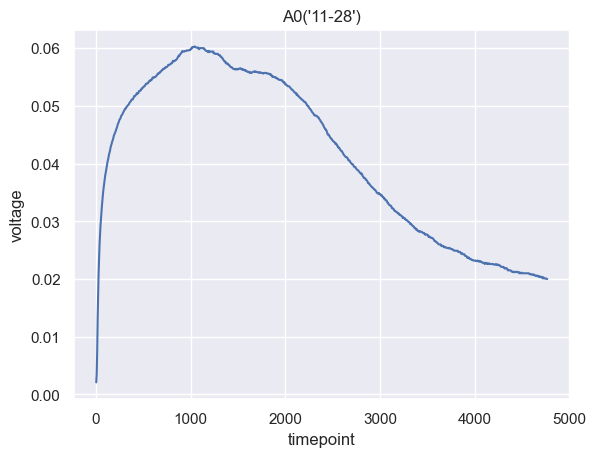

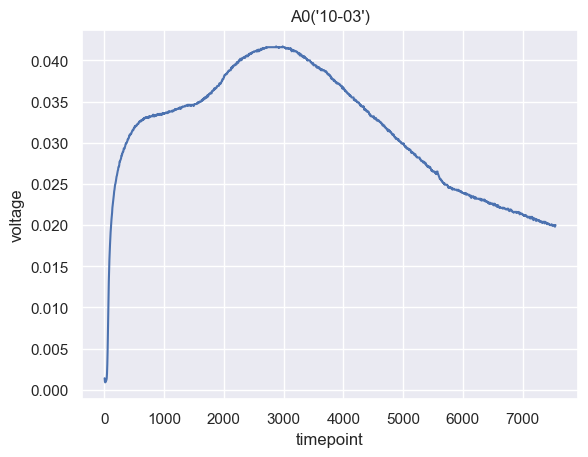

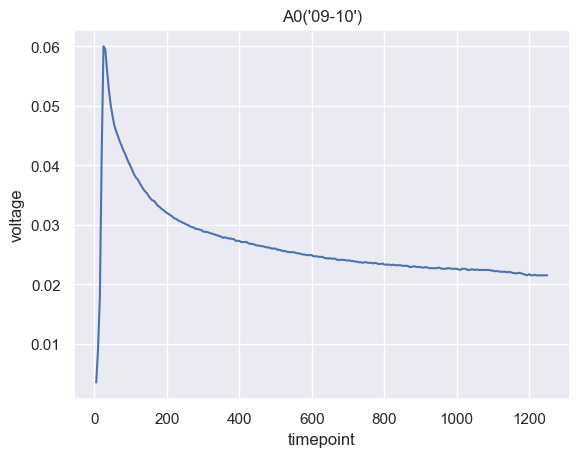

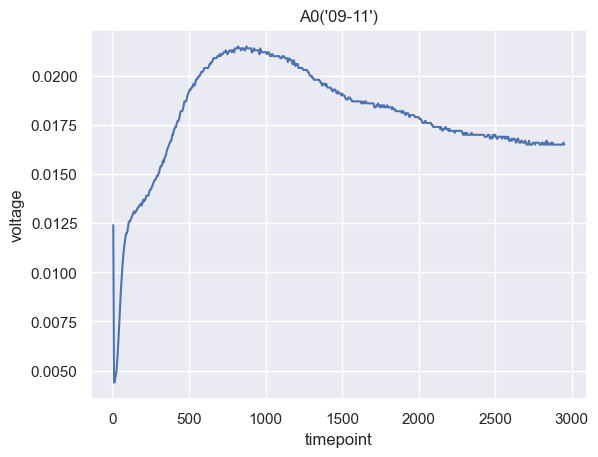

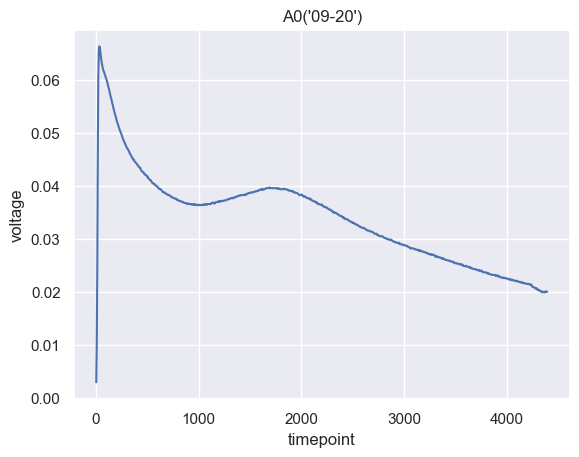

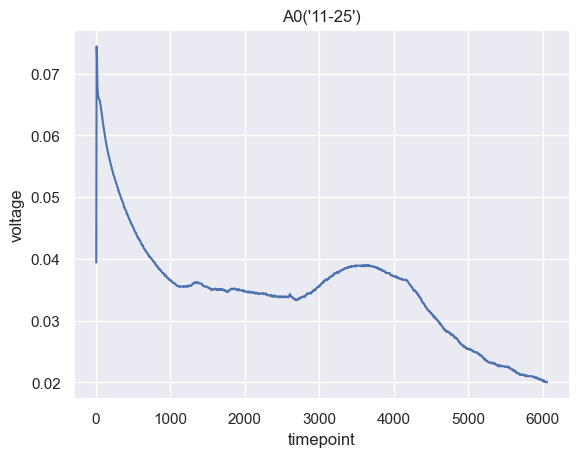

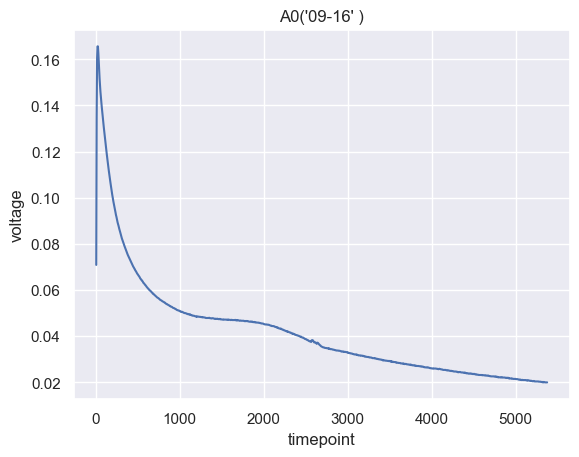

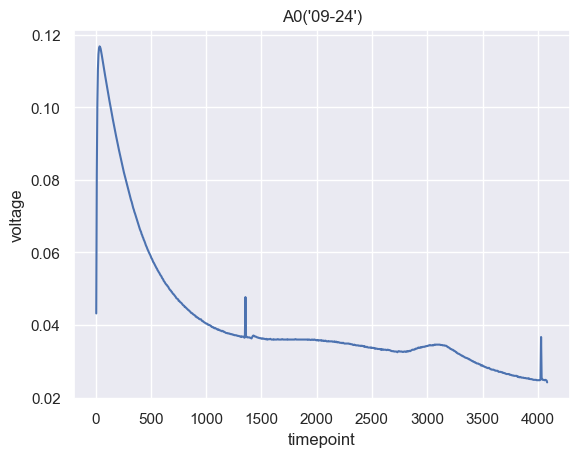

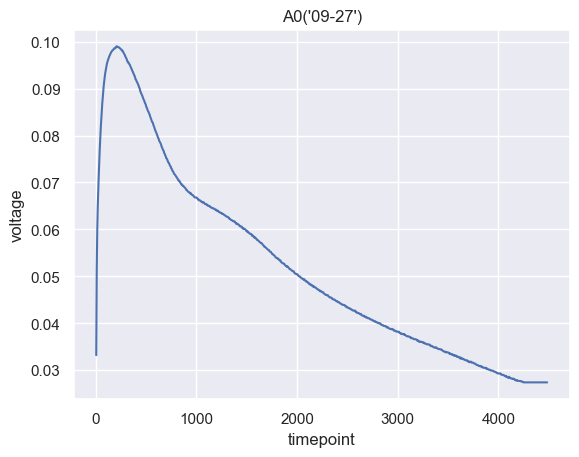

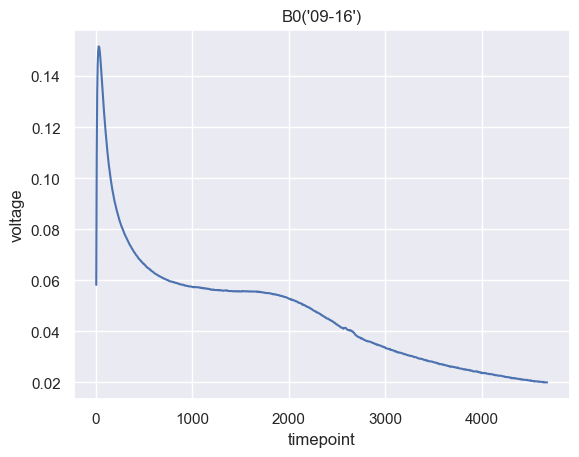

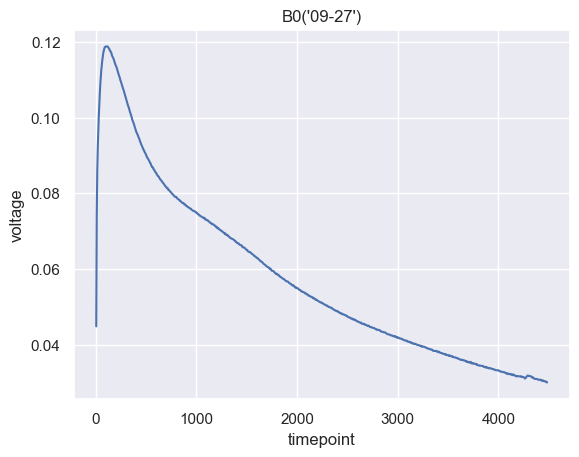

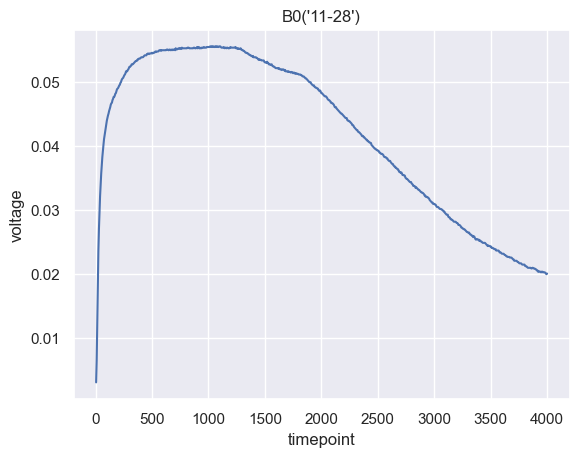

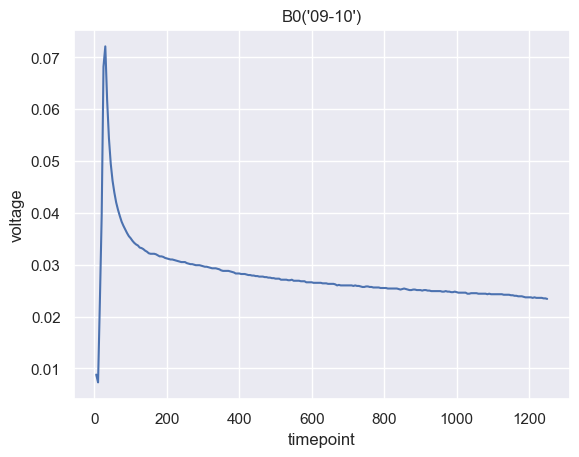

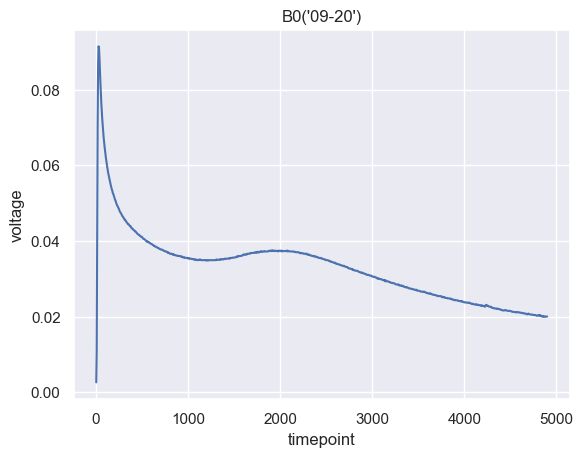

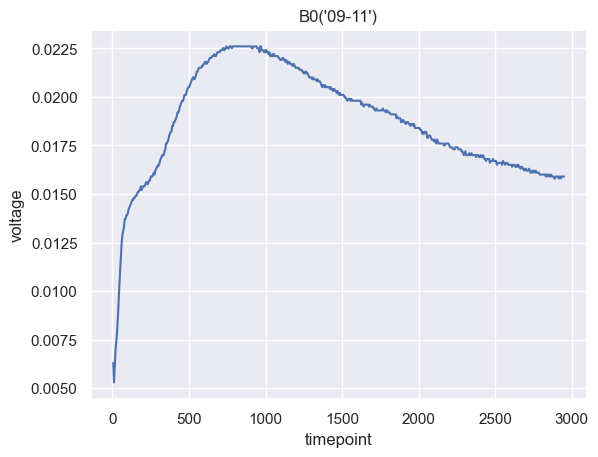

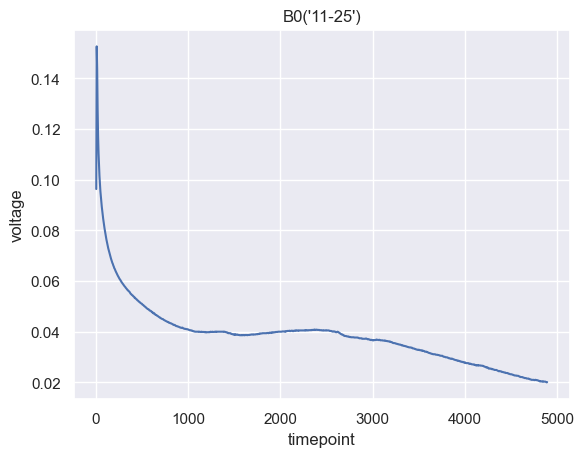

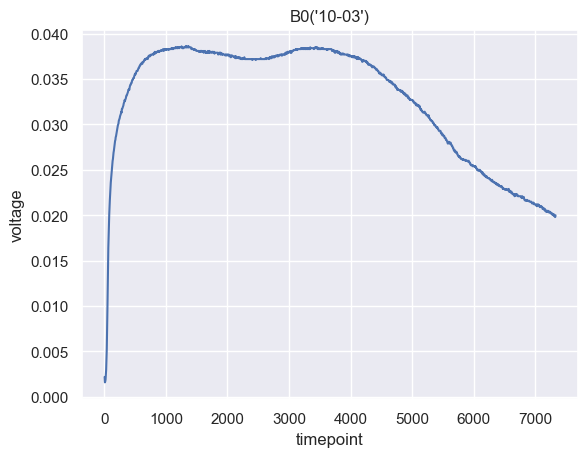

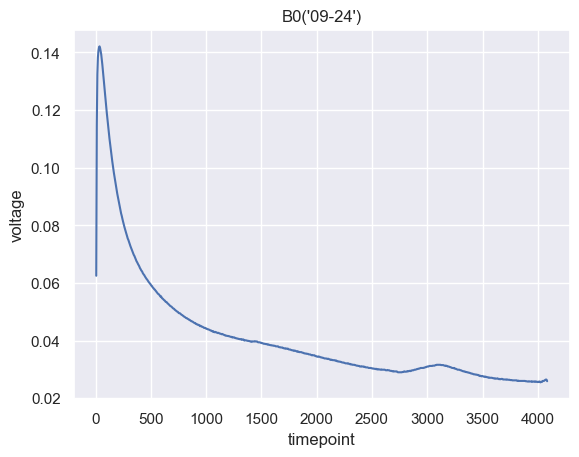

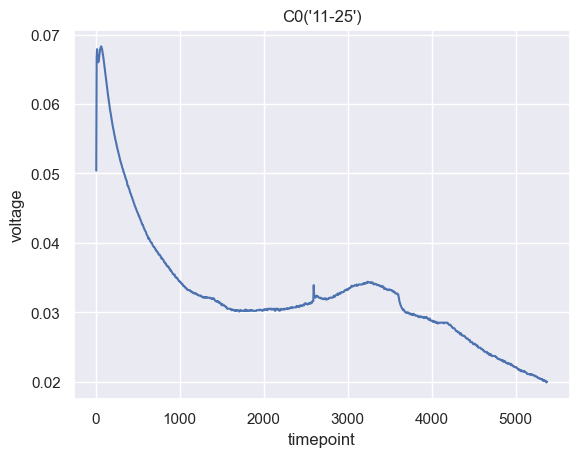

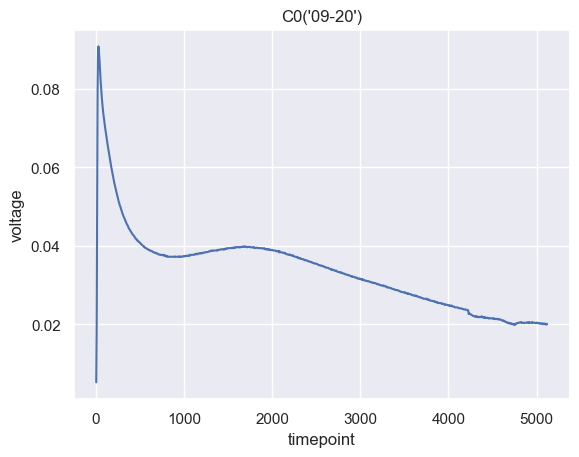

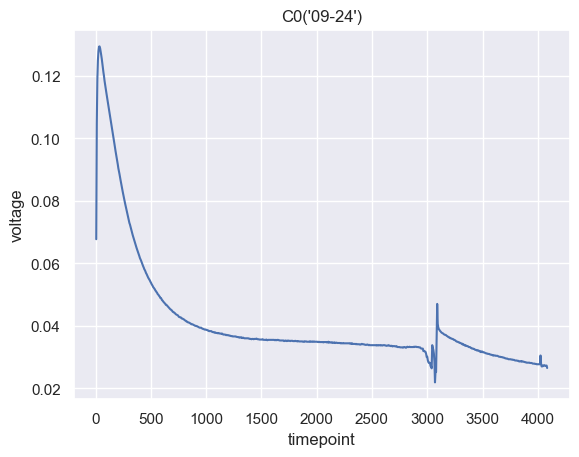

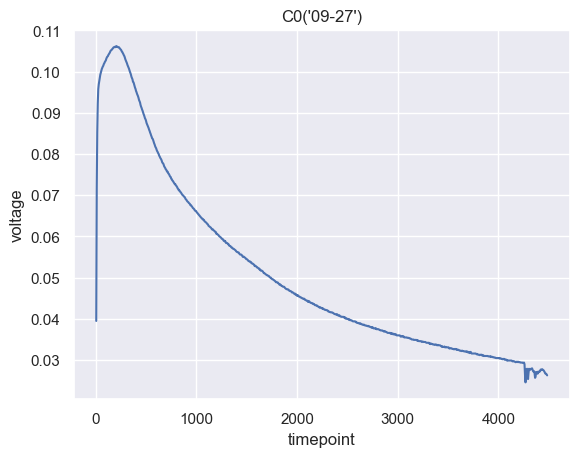

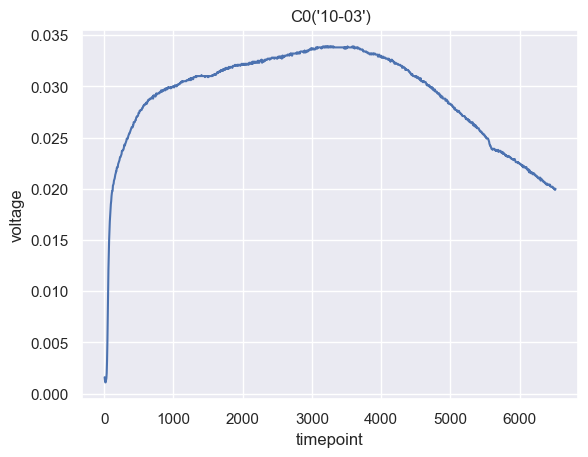

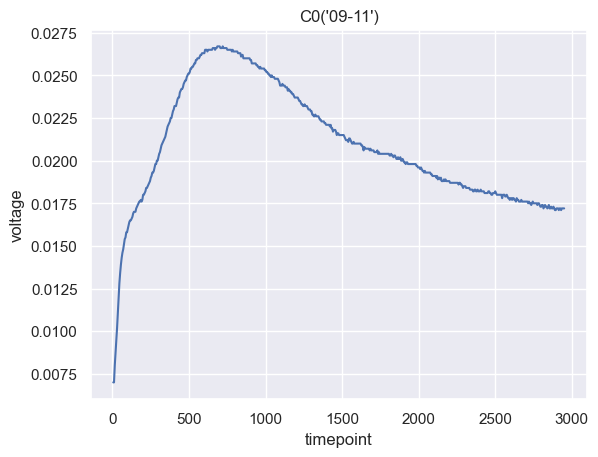

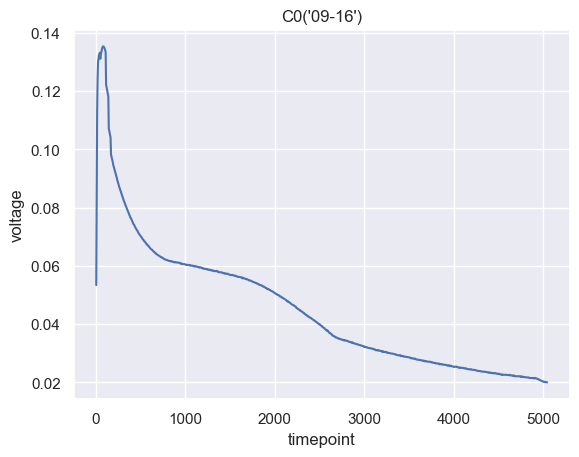

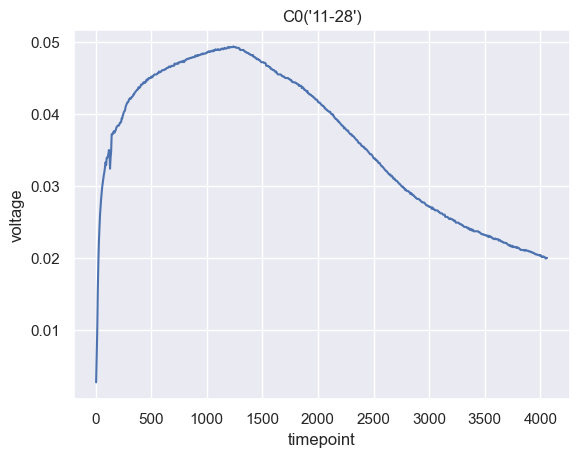

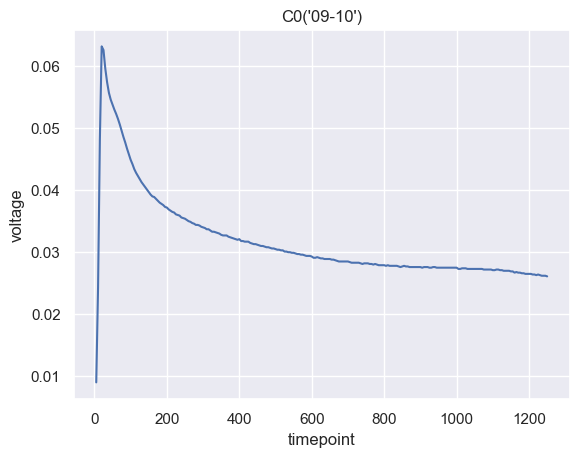

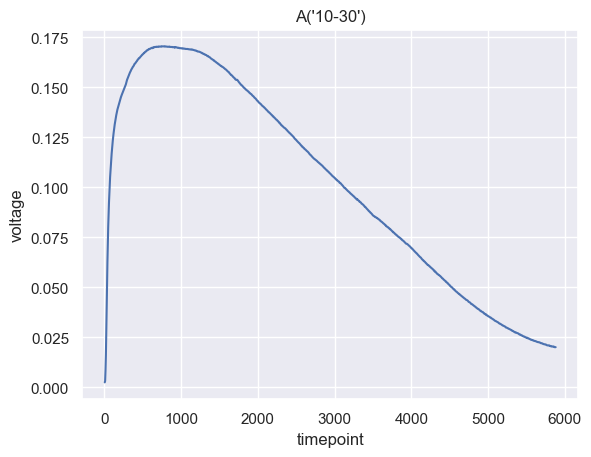

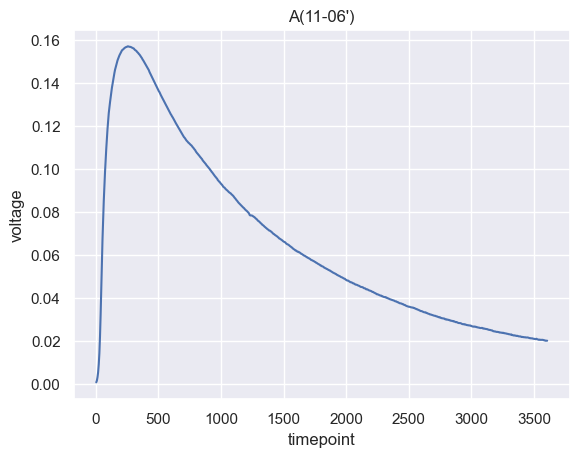

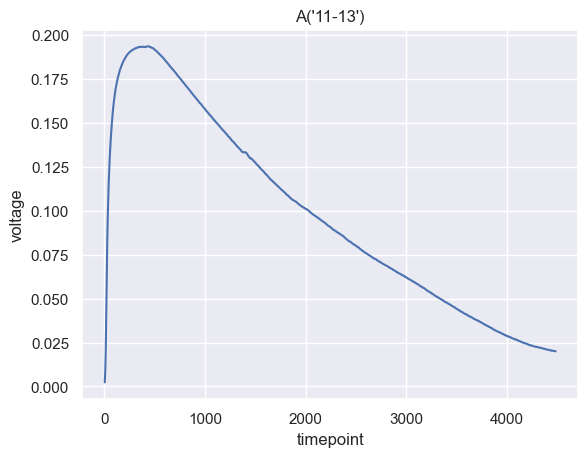

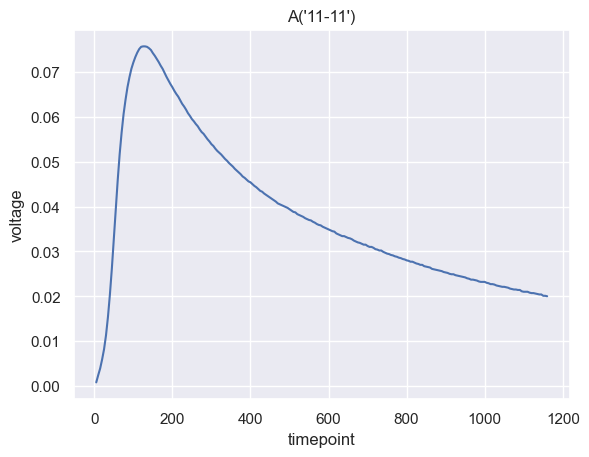

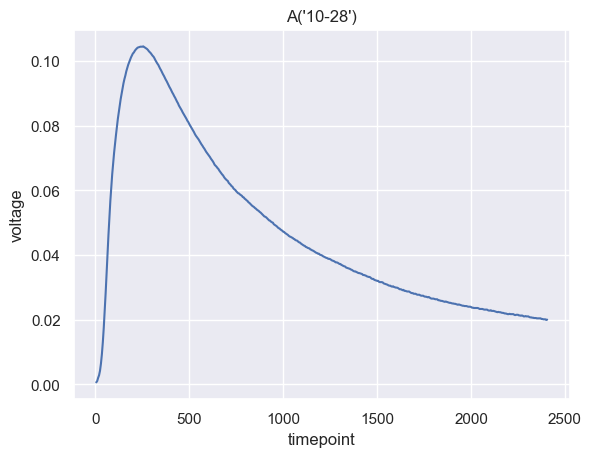

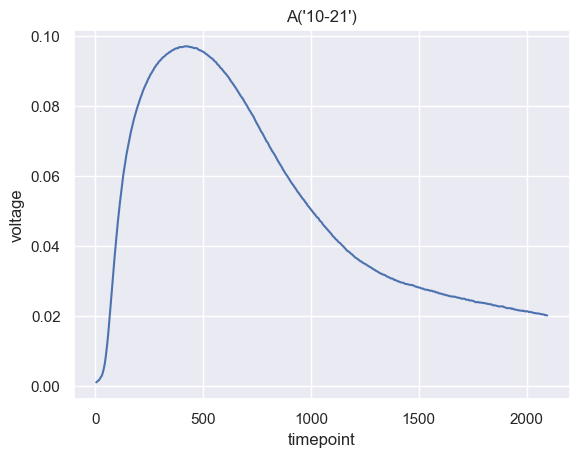

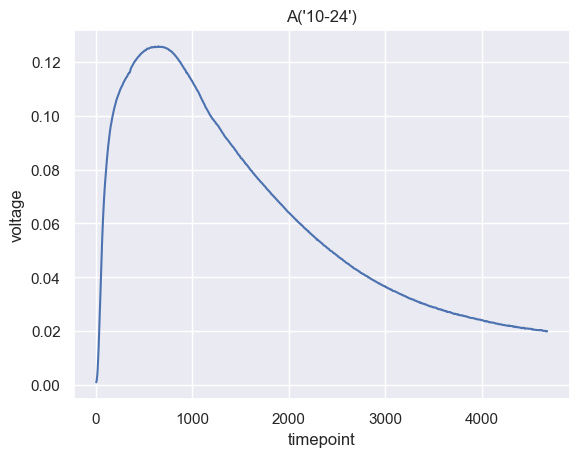

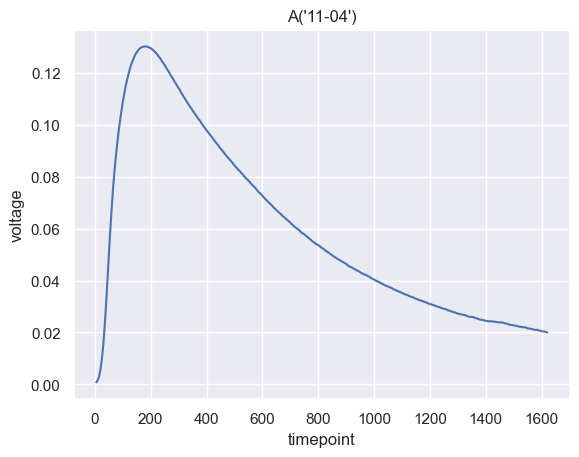

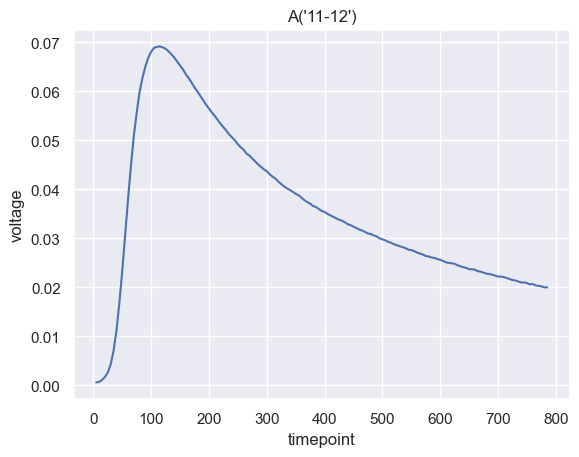

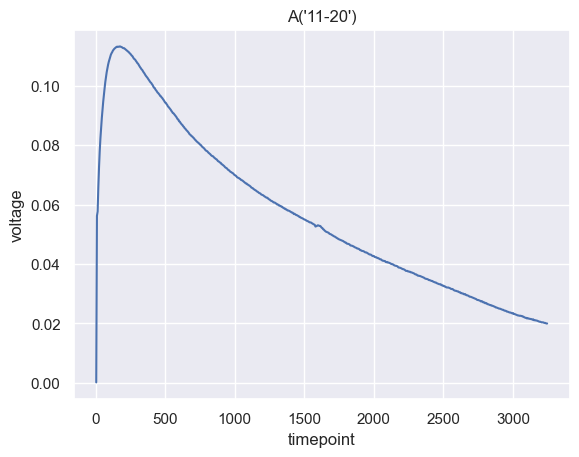

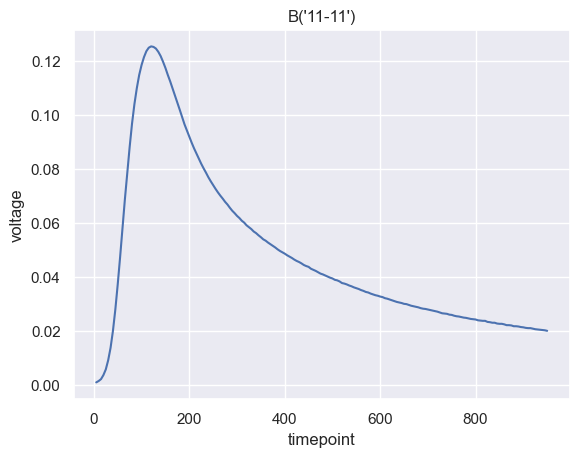

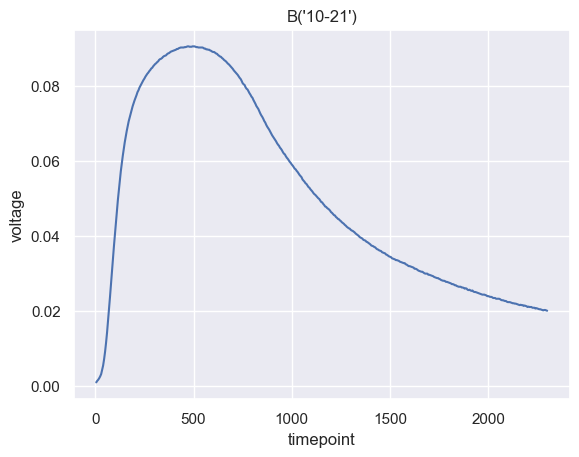

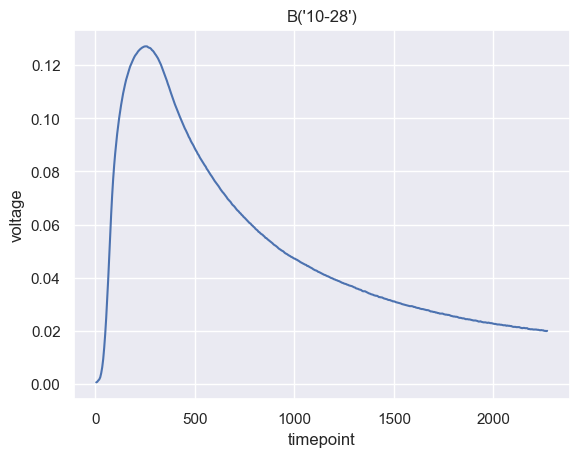

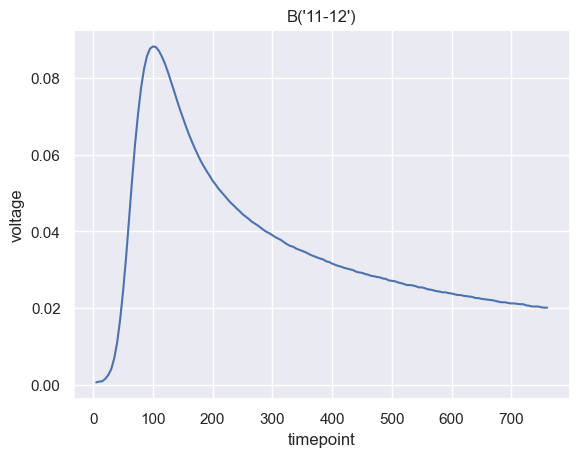

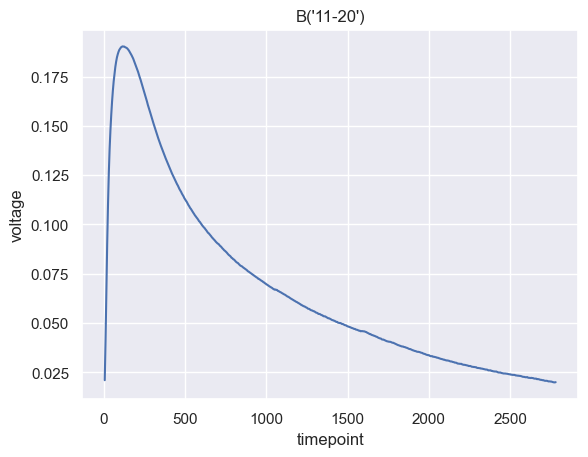

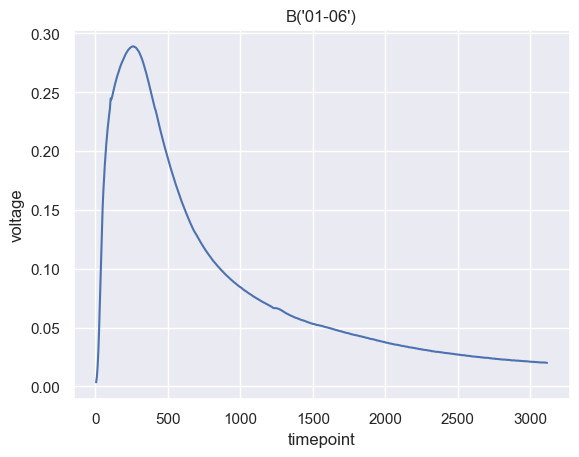

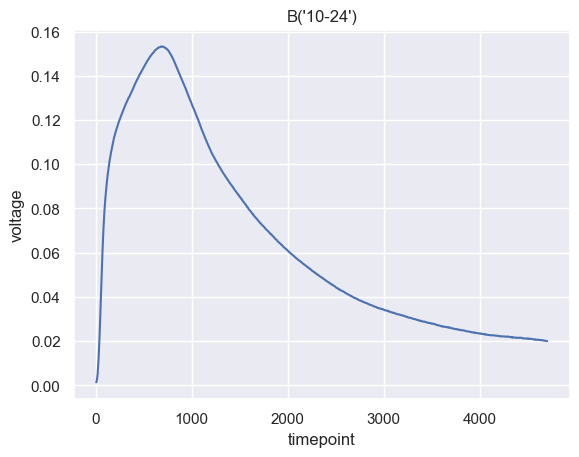

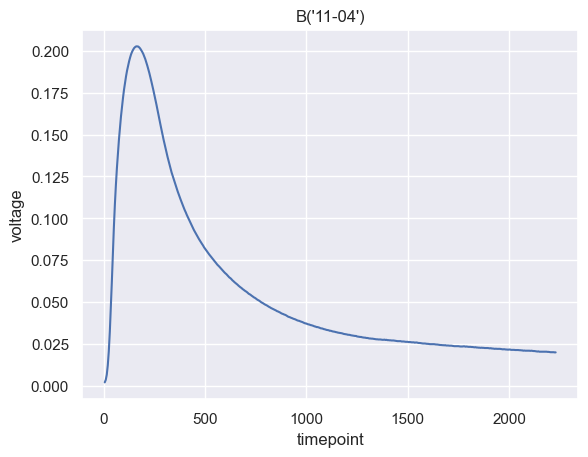

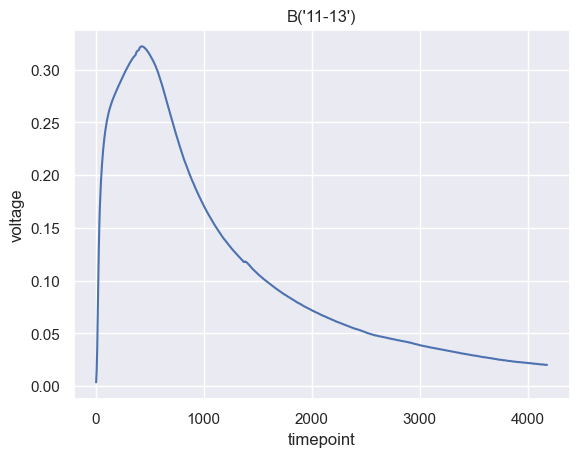

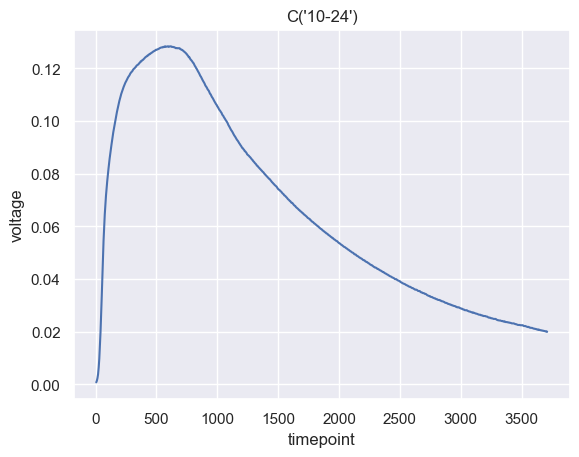

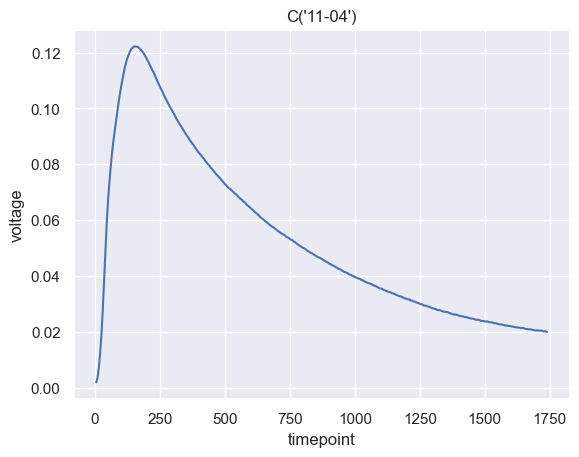

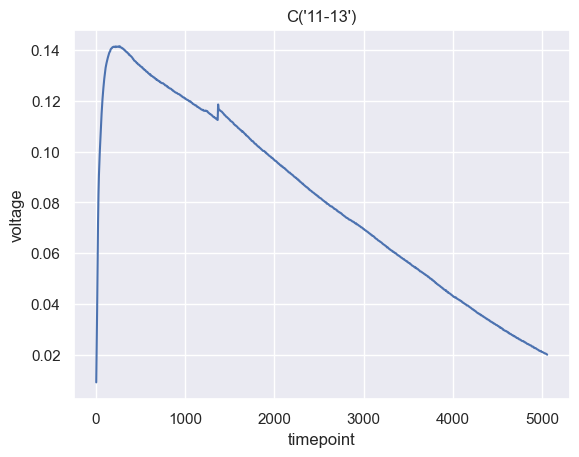

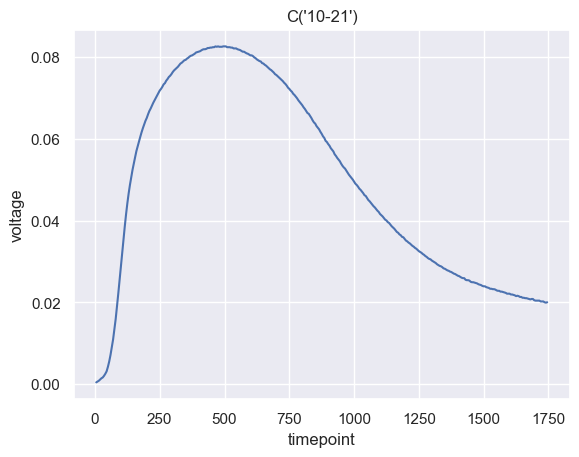

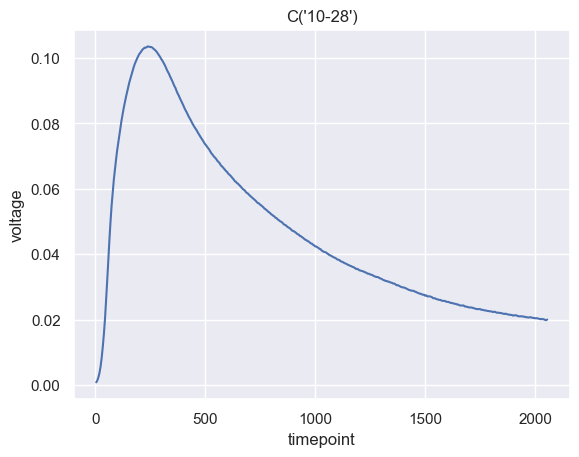

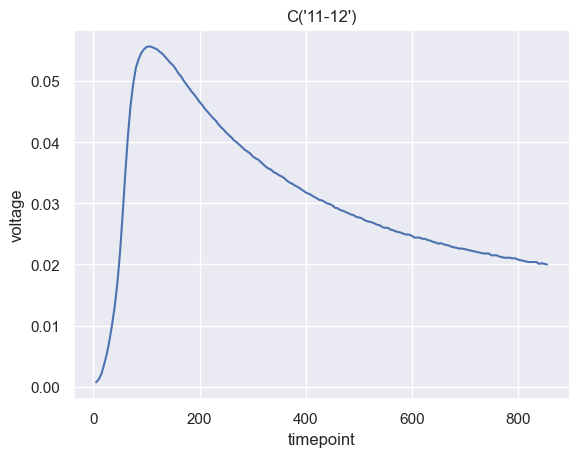

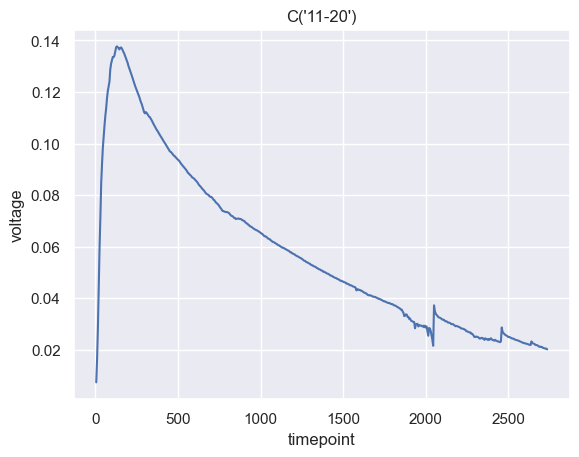

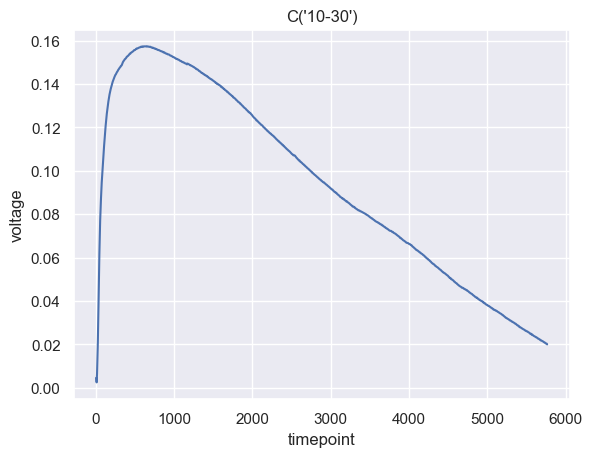

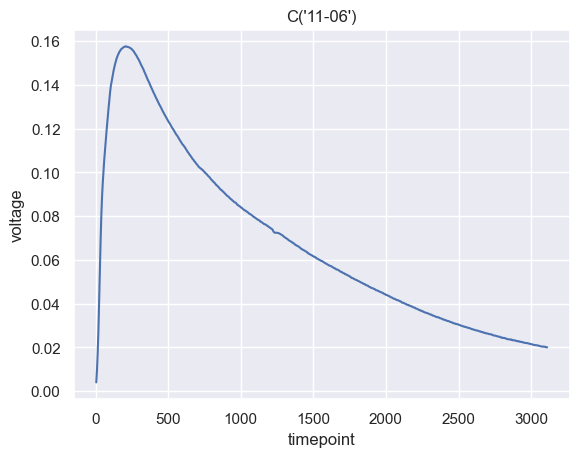

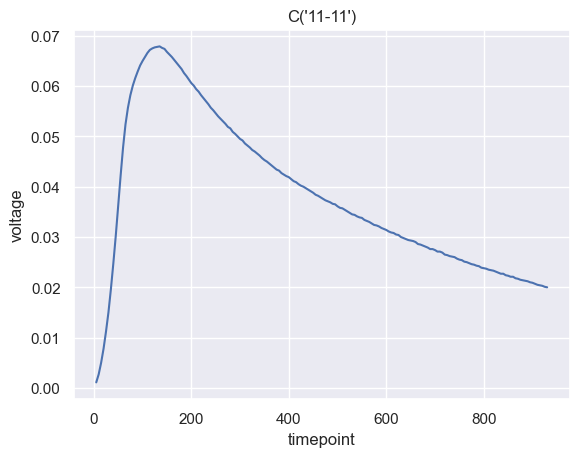

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")


k = 0
for i in range (0, 6):
    for j in range (0, len(cameraData[i])):
        plt.figure(k)
        plt.title(cameraNames[i][j])
        plt.xlabel('timepoint')
        plt.ylabel('voltage')
        plt.plot(cameraDate, cameraData[i][j]) 
        k = k + 1


In [ ]:
get_methods(cameraData[0])